In [1]:
%matplotlib inline
import os
import pandas as pd


workdir = "/Users/mjohnson/Desktop/Projects/HGT/natcomm1kp/BryoSpecificGenes"
os.chdir(workdir)
moss_or_liverwort = {x.split()[0]:x.rstrip().split()[1] for x in open("moss_or_liverwort.txt")}

In [7]:
diplolepidious = set(["FFPD","NGTD","RGKI","VMXJ","DHWX","EEMJ","IGUH","JADL","LNSF","MIRS","QKQO","QMWB","TAVP","TMAJ","VBMM","WSPM","ZACW","CMEQ","WNGH","BGXB","JMXW","XWHK","GRKU","ABCD","BPSG","RDOO","YWNF"])

In [2]:
orthogroups = pd.read_csv("Orthogroups.csv",sep="\t",header=0,index_col=0)
orthogroups.columns = [x.split("-")[0] for x in orthogroups.columns]
orthogroups

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ABCD,AWOI,BGXB,BNCU,BPSG,CMEQ,DHWX,EEMJ,FFPD,GOWD,...,WSPM,WZYK,XWHK,YBQN,YEPO,YFGP,YWNF,ZACW,ZQRI,ZTHV
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000000,scaffold-ABCD-2000489-Niphotrichum_elongatum|m...,scaffold-AWOI-2000237-Diphyscium_foliosum|m.13...,scaffold-BGXB-2001316-Plagiomnium_insigne|m.76...,NaN,scaffold-BPSG-2000364-Scouleria_aquatica|m.126...,scaffold-CMEQ-2000133-Orthotrichum_lyellii|m.1...,scaffold-DHWX-2001253-Fontinalis_antipyretica|...,scaffold-EEMJ-2002061-Thuidium_delicatulum|m.4...,scaffold-FFPD-2000041-Ceratodon_purpureus|m.13...,NaN,...,scaffold-WSPM-2001936-Rhytidiadelphus_loreus|m...,NaN,"scaffold-XWHK-2000391-Funaria|m.1582, scaffold...",NaN,scaffold-YEPO-2006613-cf._Physcomicromitrium_s...,NaN,"scaffold-YWNF-2000137-Hedwigia_ciliata|m.3648,...",scaffold-ZACW-2000039-Leucodon_sciuroides|m.83...,"scaffold-ZQRI-2000619-Timmia_austriaca|m.7142,...",scaffold-ZTHV-2007408-Atrichum_angustatum|m.66...
OG0000001,scaffold-ABCD-2060747-Niphotrichum_elongatum|m...,scaffold-AWOI-2000402-Diphyscium_foliosum|m.77...,scaffold-BGXB-2000047-Plagiomnium_insigne|m.28...,scaffold-BNCU-2004970-Radula_lindenbergia|m.13...,scaffold-BPSG-2003314-Scouleria_aquatica|m.259...,scaffold-CMEQ-2082932-Orthotrichum_lyellii|m.4536,scaffold-DHWX-2000683-Fontinalis_antipyretica|...,scaffold-EEMJ-2002059-Thuidium_delicatulum|m.4...,scaffold-FFPD-2005179-Ceratodon_purpureus|m.50...,scaffold-GOWD-2006511-Sphagnum_lescurii|m.1366...,...,scaffold-WSPM-2000258-Rhytidiadelphus_loreus|m...,scaffold-WZYK-2002497-Bazzania_trilobata|m.438...,"scaffold-XWHK-2008755-Funaria|m.3282, scaffold...",scaffold-YBQN-2000564-Odontoschisma_prostratum...,scaffold-YEPO-2000265-cf._Physcomicromitrium_s...,scaffold-YFGP-2000147-Pallavicinia_lyellii|m.6...,"scaffold-YWNF-2001919-Hedwigia_ciliata|m.6061,...",scaffold-ZACW-2001473-Leucodon_sciuroides|m.10...,"scaffold-ZQRI-2000378-Timmia_austriaca|m.2327,...",scaffold-ZTHV-2001852-Atrichum_angustatum|m.85...
OG0000002,scaffold-ABCD-2003350-Niphotrichum_elongatum|m...,scaffold-AWOI-2001469-Diphyscium_foliosum|m.93...,scaffold-BGXB-2000395-Plagiomnium_insigne|m.39...,scaffold-BNCU-2000460-Radula_lindenbergia|m.18...,scaffold-BPSG-2000086-Scouleria_aquatica|m.982...,scaffold-CMEQ-2000551-Orthotrichum_lyellii|m.8...,scaffold-DHWX-2002021-Fontinalis_antipyretica|...,scaffold-EEMJ-2006917-Thuidium_delicatulum|m.5184,scaffold-FFPD-2000315-Ceratodon_purpureus|m.63...,scaffold-GOWD-2000008-Sphagnum_lescurii|m.1137...,...,scaffold-WSPM-2002551-Rhytidiadelphus_loreus|m...,scaffold-WZYK-2000026-Bazzania_trilobata|m.875...,"scaffold-XWHK-2038867-Funaria|m.284, scaffold-...",scaffold-YBQN-2000339-Odontoschisma_prostratum...,scaffold-YEPO-2005537-cf._Physcomicromitrium_s...,scaffold-YFGP-2000156-Pallavicinia_lyellii|m.1...,"scaffold-YWNF-2000611-Hedwigia_ciliata|m.6846,...",scaffold-ZACW-2002477-Leucodon_sciuroides|m.14...,"scaffold-ZQRI-2056038-Timmia_austriaca|m.3241,...",scaffold-ZTHV-2069503-Atrichum_angustatum|m.1705
OG0000003,scaffold-ABCD-2002235-Niphotrichum_elongatum|m...,scaffold-AWOI-2011096-Diphyscium_foliosum|m.52...,scaffold-BGXB-2005194-Plagiomnium_insigne|m.58...,scaffold-BNCU-2001255-Radula_lindenbergia|m.27...,scaffold-BPSG-2004636-Scouleria_aquatica|m.154...,scaffold-CMEQ-2000047-Orthotrichum_lyellii|m.7...,scaffold-DHWX-2003929-Fontinalis_antipyretica|...,scaffold-EEMJ-2000747-Thuidium_delicatulum|m.4...,scaffold-FFPD-2004398-Ceratodon_purpureus|m.82...,scaffold-GOWD-2005373-Sphagnum_lescurii|m.1354...,...,scaffold-WSPM-2000914-Rhytidiadelphus_loreus|m...,scaffold-WZYK-2003230-Bazzania_trilobata|m.126...,"scaffold-XWHK-2000242-Funaria|m.4692, scaffold...",scaffold-YBQN-2001078-Odontoschisma_prostratum...,scaffold-YEPO-2001348-cf._Physcomicromitrium_s...,scaffold-YFGP-2003203-Pallavicinia_lyellii|m.1...,"scaffold-YWNF-2001349-Hedwigia_ciliata|m.7154,...",scaffold-ZACW-2003765-Leucodon_sciuroides|m.10...,"scaffold-ZQRI-2000122-Timmia_austriaca|m.4704,...",scaffold-ZTHV-2004752-Atrichum_angustatum|m.41...
OG0000004,scaf

In [3]:
orthogroups_counts = orthogroups.apply(lambda x: x.str.count(",") + 1)
orthogroups_counts.fillna(0,inplace=True)
physco_and_junger = orthogroups_counts[(orthogroups_counts.Physco_resort > 0) & (orthogroups_counts.Junger_resort > 0)]

print(len(orthogroups_counts))
print("{} orthogroups have Physcomitrella".format(len(orthogroups_counts[(orthogroups_counts.Physco_resort > 0)])))
print("{} orthogroups have Jungermannia".format(len(orthogroups_counts[(orthogroups_counts.Junger_resort > 0)])))
print("{} orthogroups have both Physcomitrella and Jungermannia".format(len(physco_and_junger)))

42247
1689 orthogroups have Physcomitrella
1003 orthogroups have Jungermannia
163 orthogroups have both Physcomitrella and Jungermannia


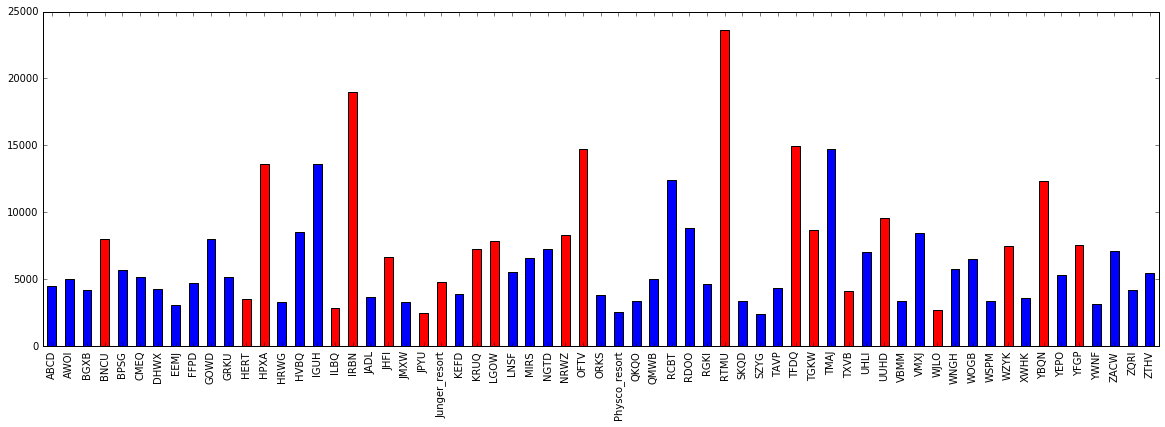

In [4]:
my_color_map = {x:"b" if moss_or_liverwort[x] == "moss" else "r" for x in moss_or_liverwort}
colors=[my_color_map[x] for x in orthogroups_counts.columns]
orthogroups_counts.apply(sum).plot(kind="bar",color=colors,figsize = (20,6))

In [8]:
orthogroup_presabs = orthogroups_counts.apply(lambda x: x > 0)
moss_presabs = orthogroup_presabs[[x for x in orthogroup_presabs.columns if moss_or_liverwort[x] == "moss"]]
liverwort_presabs = orthogroup_presabs[[x for x in orthogroup_presabs.columns if moss_or_liverwort[x] == "liverwort"]]
diplolep_presabs = orthogroup_presabs[[x for x in orthogroup_presabs.columns if x in diplolepidious]]
species_count = orthogroup_presabs.apply(sum,axis=1)
moss_count = moss_presabs.apply(sum,axis=1)
liverwort_count = liverwort_presabs.apply(sum,axis=1)
diplolep_count = diplolep_presabs.apply(sum,axis=1)
has_physco = orthogroups_counts.Physco_resort.apply(lambda x: x > 0)
has_junger = orthogroups_counts.Junger_resort.apply(lambda x: x > 0)
num_seqs = orthogroups_counts.apply(sum,axis=1)



In [10]:
ortho_summary = pd.concat([species_count,moss_count,liverwort_count,diplolep_count,has_physco,has_junger,num_seqs],axis=1)
ortho_summary.columns=["Species","Mosses","Liverworts","Diplolepidious","HasPhysco","HasJunger","NumSeqs"]
ortho_summary[(ortho_summary.Mosses > 20) & 
              (ortho_summary.Liverworts == 0) & 
              (ortho_summary.NumSeqs < 2*ortho_summary.Species)]


,Species,Mosses,Liverworts,Diplolepidious,HasPhysco,HasJunger,NumSeqs
Orthogroup,,,,,,,
OG0000568,41,41,0,26,True,False,80.0
OG0000639,41,41,0,27,True,False,75.0
OG0000658,38,38,0,25,True,False,73.0
OG0000659,38,38,0,24,False,False,73.0
OG0000663,39,39,0,27,True,False,73.0
OG0000665,38,38,0,27,True,False,73.0
OG0000736,36,36,0,26,True,False,67.0
OG0000737,39,39,0,26,True,False,67.0
OG0000782,35,35,0,26,True,False,65.0


In [42]:
moss_only_noPhysco = ortho_summary[(ortho_summary.Liverworts == 0) & (ortho_summary.HasPhysco == False)] 
moss_orthogroup_sizes = moss_only_noPhysco.Species.value_counts()

at_least_x = len(moss_only_noPhysco) - moss_orthogroup_sizes.sort_index().cumsum()
at_least_x

1     9647
2     4738
3     3015
4     2154
5     1588
6     1220
7      974
8      791
9      641
10     509
11     419
12     349
13     282
14     226
15     183
16     153
17     133
18     113
19      91
20      73
21      63
22      55
23      48
24      42
25      33
26      29
27      26
28      24
29      19
30      17
31      14
32      10
33       9
35       5
36       4
38       3
39       1
41       0
Name: Species, dtype: int64

In [17]:
diplolep_orthogroups = ortho_summary[(ortho_summary.Liverworts == 0) & 
                                     (ortho_summary.HasPhysco == False) & 
                                     (ortho_summary.Mosses - ortho_summary.Diplolepidious == 0)] 
diplolep_orthogroup_sizes = diplolep_orthogroups.Species.value_counts()

at_least_x = len(diplolep_orthogroups) - diplolep_orthogroup_sizes.sort_index().cumsum()
at_least_x

1     3507
2     1113
3      515
4      259
5      152
6       93
7       62
8       42
9       32
10      23
11      15
12       9
13       3
14       1
15       0
Name: Species, dtype: int64

In [19]:
diplolep_orthogroups[diplolep_orthogroups.Diplolepidious > 11]

,Species,Mosses,Liverworts,Diplolepidious,HasPhysco,HasJunger,NumSeqs
Orthogroup,,,,,,,
OG0001963,13,13,0,13,False,False,35.0
OG0002962,13,13,0,13,False,False,27.0
OG0003293,13,13,0,13,False,False,25.0
OG0004175,14,14,0,14,False,False,20.0
OG0004540,15,15,0,15,False,False,19.0
OG0004545,13,13,0,13,False,False,19.0
OG0005349,13,13,0,13,False,False,17.0
OG0005446,14,14,0,14,False,False,16.0
OG0006114,12,12,0,12,False,False,15.0
